In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df = pd.read_csv('auto-mpg.csv')

In [31]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [32]:
import seaborn as sns

<Axes: xlabel='count', ylabel='horsepower'>

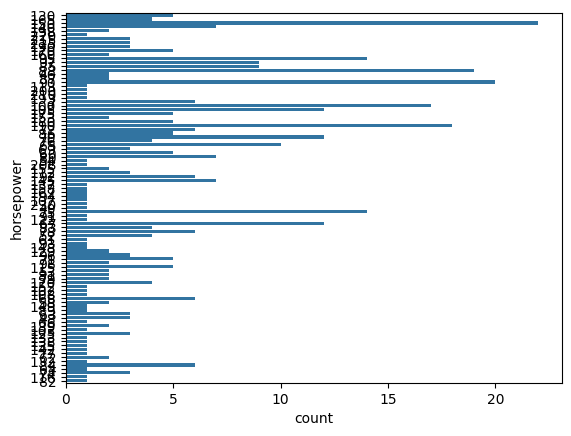

In [33]:
plt.figure()
sns.countplot(df['horsepower'])

In [34]:
df = df[df['horsepower'] != '?']

In [35]:
df['horsepower'] = df['horsepower'].astype(float)

In [36]:
X = df.iloc[:,1:8]
y = df.iloc[:,0]

In [37]:
## train test spit
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=30)

In [43]:
## standardScalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: >

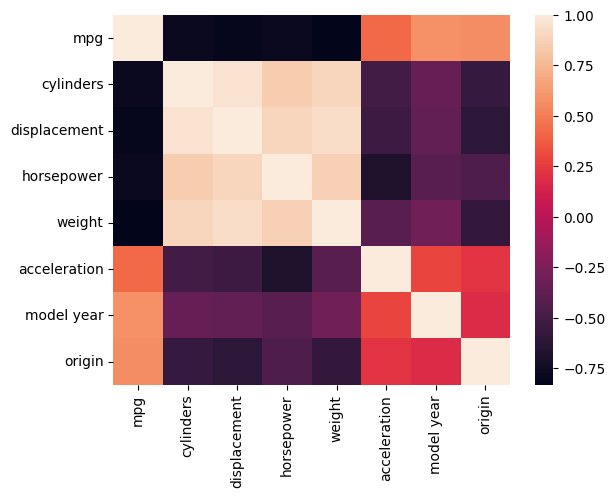

In [27]:
df_copy = pd.read_csv('auto-mpg.csv')
df_copy = df.iloc[:,:8]
sns.heatmap(df_copy.corr())

Text(0.5, 1.0, 'X_train after scalling')

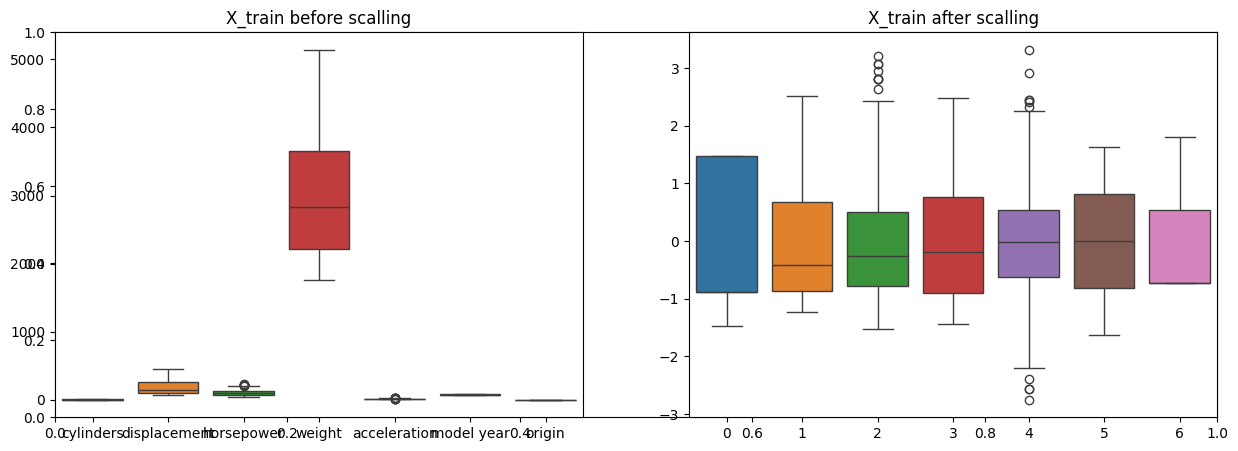

In [39]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title('X_train before scalling')
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title('X_train after scalling')

0.7566278506778155
2.9307076428186876
15.459098260516317


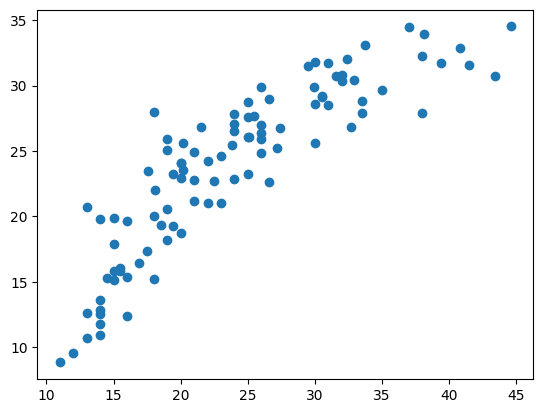

In [44]:
## Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
linerReg = LinearRegression()
linerReg.fit(X_train_scaled,y_train)
y_pred = linerReg.predict(X_test_scaled)
## performace metrices 
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred)

0.7563928205566601
2.916568975641076
15.474027469742765


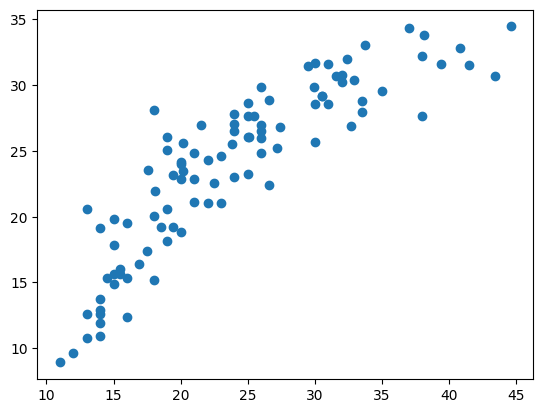

In [45]:
## Rigid regression
from sklearn.linear_model import Ridge
# from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
Ridgereg = Ridge()
Ridgereg.fit(X_train_scaled,y_train)
y_pred = Ridgereg.predict(X_test_scaled)
## performace metrices 
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred)

0.6900278920105796
3.210950230091561
19.689554818715738


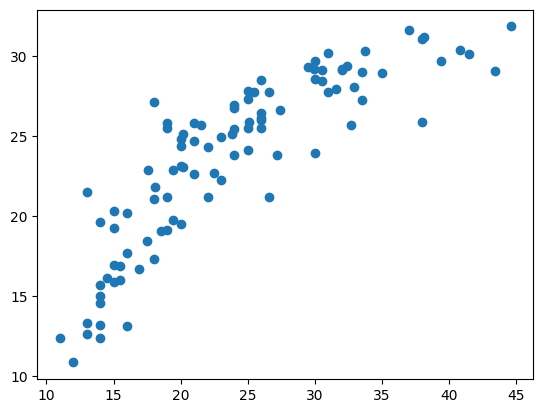

In [46]:
## lasso regression
from sklearn.linear_model import Lasso
# from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lassoReg = Lasso()
lassoReg.fit(X_train_scaled,y_train)
y_pred = lassoReg.predict(X_test_scaled)
## performace metrices 
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred)